In [1]:
from sympy import *
import sympy

In [2]:
init_printing()

In [3]:
m,th,ph,kx,ky=symbols('m theta phi kx ky',positive=True)
mi,mz=symbols('m_i,m_z',positive=True)

In [4]:
def mataf(h):
    'Array flatten a matrix list of appropriate dimensions'
    H=Matrix.hstack(*h[0])
    for sor in range(1,len(h)):
        H=Matrix.vstack(H,Matrix.hstack(*h[sor]))
    return H

In [5]:
S1=sympy.physics.matrices.msigma(1)
S2=sympy.physics.matrices.msigma(2)
S3=sympy.physics.matrices.msigma(3)
S0=S1*S1

S=Matrix([[S1],[S2],[S3]])

In [28]:
mv=m*Matrix([[sin(th)*cos(ph)],
             [sin(th)*sin(ph)],
             [cos(th)]])

mv=0*Matrix([[mi*cos(ph)],
             [mi*sin(ph)],
             [mz]])


#mv=m*Matrix([[0],[0],[1]])

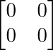

In [29]:
simplify((mv.T*S)[0])

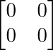

In [30]:
simplify(((rot_axis3(-pi/3)*mv).T*S)[0])

In [67]:
a1=Matrix([[1],
           [-sqrt(3)]])/2
a2=Matrix([[1],
           [sqrt(3)]])/2

k=Matrix([[kx],
           [ky]])

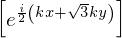

In [43]:
sympy.exp(I*k.T*a1)

In [44]:
U=mataf([[0*S0,S0+I*simplify((mv.T*S)[0])],
         [-I*simplify((mv.T*S)[0]),0*S0]])

In [45]:
Tx=simplify(mataf([[0*S0,S0+I*simplify(((rot_axis3(pi/3)*mv).T*S)[0])],
         [0*S0,0*S0]]))
Ty=simplify(mataf([[0*S0,S0+I*simplify(((rot_axis3(-pi/3)*mv).T*S)[0])],
         [0*S0,0*S0]]))

In [46]:
H=simplify(U+exp(I*k.T*a1)[0]*Tx+exp(I*k.T*a2)[0]*Ty+exp(-I*k.T*a1)[0]*Tx.H+exp(-I*k.T*a2)[0]*Ty.H)

In [68]:
A=simplify(Matrix([[0,1+exp(I*k.T*a1)[0]+exp(I*k.T*a2)[0]],
                   [1+exp(-I*k.T*a1)[0]+exp(-I*k.T*a2)[0],0]]))


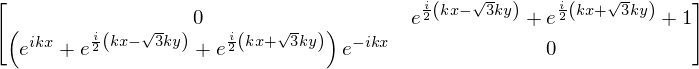

In [70]:
A